In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [186]:
df=pd.read_csv("Housing Price Prediction.csv")

In [187]:
#  the first column is the target variable 'price'
X = df.iloc[:, 1:]  # Select all columns except the first one
y = df.iloc[:, 0]   # Select the first column

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [189]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [190]:
df.shape

(545, 13)

In [191]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [192]:
print(df.index)

RangeIndex(start=0, stop=545, step=1)


In [193]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [194]:
from sklearn.preprocessing import LabelEncoder

In [195]:
label_encoder= LabelEncoder()
print(LabelEncoder)

<class 'sklearn.preprocessing._label.LabelEncoder'>


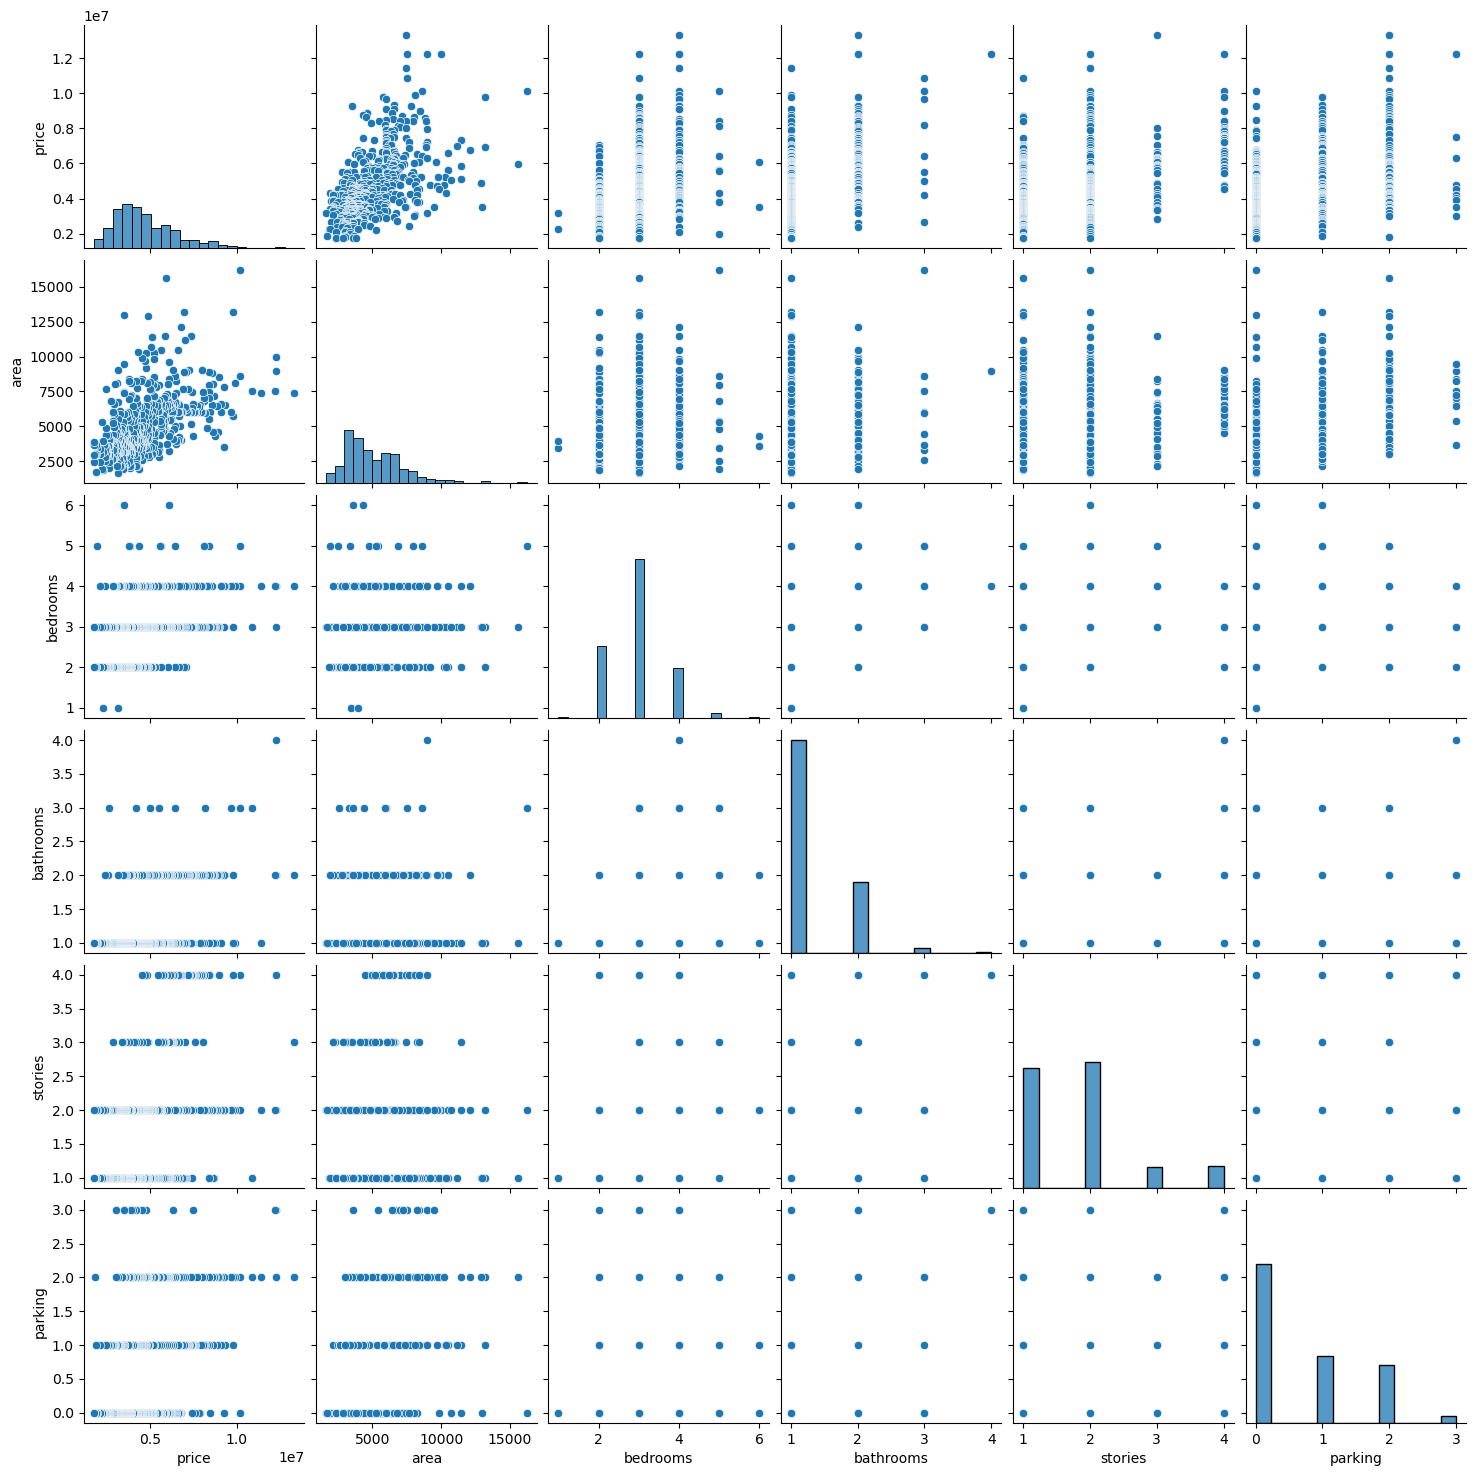

In [196]:
sns.pairplot(df)

# Mapping of yes and no

In [197]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
X[varlist] = X[varlist].apply(binary_map)

In [198]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7420,4,1,2,1,1,1,0,1,2,0,furnished


# one hot encoding 

In [199]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#create a variable for column transformerclass
ct=ColumnTransformer(transformers=[("Encoder",OneHotEncoder(),[11])],remainder="passthrough")


In [200]:
X=np.array(ct.fit_transform(X))

In [201]:
print (X)

[[1. 0. 0. ... 1. 2. 1.]
 [1. 0. 0. ... 1. 3. 0.]
 [0. 1. 0. ... 0. 2. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


# spliiting datasets ofr training and testing


In [202]:
#  Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [203]:
print (X_train)

[[0. 1. 0. ... 0. 2. 0.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 2. 0.]]


# feature scaling

In [204]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,3:]=sc.fit_transform(X_train[:,3:])
X_test[:,3:]=sc.transform(X_test[:,3:])

In [205]:
print(X_train)

[[ 0.          1.          0.         ... -0.65536875  1.52938183
  -0.56675579]
 [ 1.          0.          0.         ...  1.52585854 -0.79805439
   1.76442839]
 [ 0.          0.          1.         ... -0.65536875 -0.79805439
  -0.56675579]
 ...
 [ 0.          0.          1.         ...  1.52585854 -0.79805439
   1.76442839]
 [ 0.          1.          0.         ...  1.52585854  0.36566372
  -0.56675579]
 [ 1.          0.          0.         ...  1.52585854  1.52938183
  -0.56675579]]


In [206]:
print(X_test)

[[ 1.          0.          0.         ...  1.52585854  0.36566372
  -0.56675579]
 [ 0.          0.          1.         ... -0.65536875  2.69309993
  -0.56675579]
 [ 0.          1.          0.         ... -0.65536875  0.36566372
  -0.56675579]
 ...
 [ 1.          0.          0.         ... -0.65536875  0.36566372
  -0.56675579]
 [ 1.          0.          0.         ... -0.65536875  0.36566372
  -0.56675579]
 [ 0.          1.          0.         ...  1.52585854 -0.79805439
   1.76442839]]


# Model creation

In [207]:
# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [208]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)


In [209]:
print(len(X_train))
print(len(y_train))
print(len(regressor.predict(X_train)))

436
436
436


Text(0, 0.5, 'Predicted Prices')

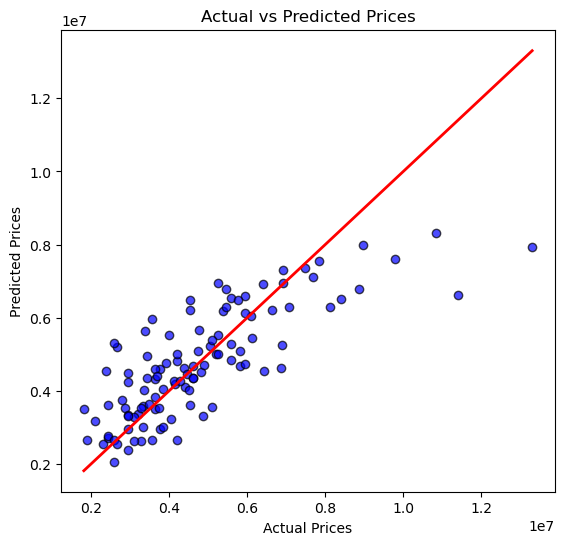

In [210]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Scatter plot: Actual vs. Predicted Prices
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')


In [211]:
# cheaking r2 score
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6221280430074461

Text(0, 0.5, 'y_pred')

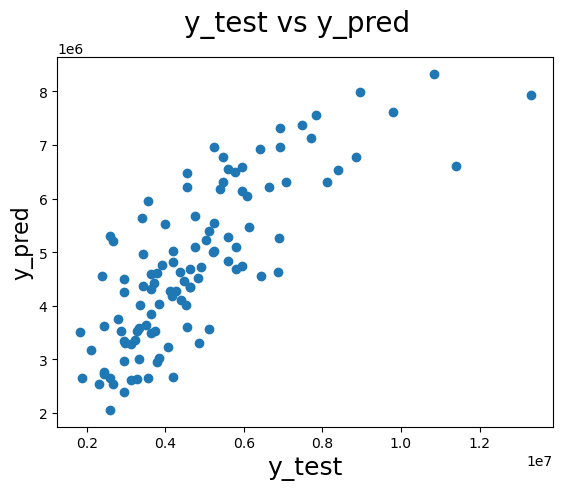

In [212]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 